In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread
from PIL import Image

## Load images

In [2]:
pathlist = Path("./102flowers/102flowers").glob('**/*.jpg')
X = [imread(str(path)) for path in pathlist]
mat = loadmat("./102flowers/imagelabels.mat")
y = mat['labels'][0, :]

In [3]:
print("number of classes is:", len(np.unique(y)))

number of classes is: 102


In [4]:
X, y = shuffle(X, y, random_state=33)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=33)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, test_size=0.5, random_state=33)

## Images sizes

In [5]:
img_meta = []
for i, img in enumerate(X_train):
        img_meta.append({"size": img.shape,
                         "width": img.shape[0],
                         "height": img.shape[1],
                         "aspect ratio": round(img.shape[0] / img.shape[1], 2)})

In [6]:
img_meta_df = pd.DataFrame.from_dict(img_meta)
img_meta_df

size  width  height  aspect ratio
0     (500, 577, 3)    500     577          0.87
1     (500, 500, 3)    500     500          1.00
2     (640, 500, 3)    640     500          1.28
3     (500, 667, 3)    500     667          0.75
4     (500, 704, 3)    500     704          0.71
...             ...    ...     ...           ...
4089  (500, 672, 3)    500     672          0.74
4090  (575, 500, 3)    575     500          1.15
4091  (500, 667, 3)    500     667          0.75
4092  (500, 666, 3)    500     666          0.75
4093  (500, 600, 3)    500     600          0.83

[4094 rows x 4 columns]

Text(0, 0.5, 'Height')

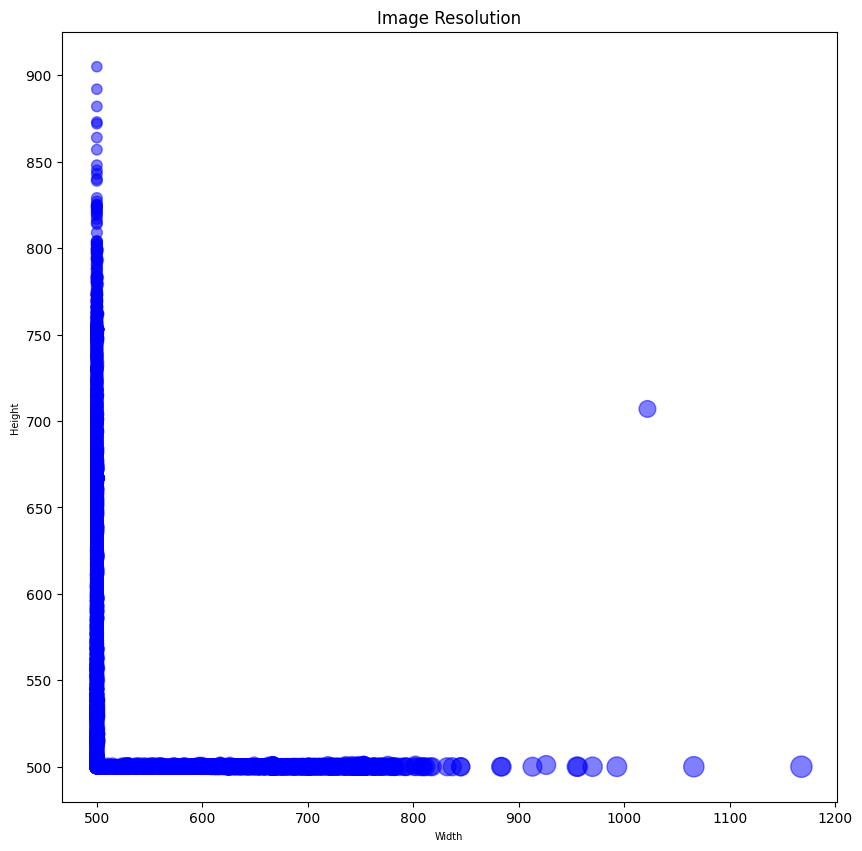

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.width, img_meta_df.height, color='blue',
                    alpha=0.5, s=img_meta_df["aspect ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=7)
ax.set_ylabel("Height", size=7)

## Resize

In [5]:
del X
del X_train
del X_val
del X_test
del y
del y_train
del y_val
del y_test

In [8]:
pathlist = Path("./102flowers/102flowers").glob('**/*.jpg')
for path in pathlist:
    og_img = Image.open(str(path))
    img = og_img.resize((512, 512))
    print(path.name)
    img.save(f"./102flowers/resized_512/{path.name}")

image_00001.jpg
image_00002.jpg
image_00003.jpg
image_00004.jpg
image_00005.jpg
image_00006.jpg
image_00007.jpg
image_00008.jpg
image_00009.jpg
image_00010.jpg
image_00011.jpg
image_00012.jpg
image_00013.jpg
image_00014.jpg
image_00015.jpg
image_00016.jpg
image_00017.jpg
image_00018.jpg
image_00019.jpg
image_00020.jpg
image_00021.jpg
image_00022.jpg
image_00023.jpg
image_00024.jpg
image_00025.jpg
image_00026.jpg
image_00027.jpg
image_00028.jpg
image_00029.jpg
image_00030.jpg
image_00031.jpg
image_00032.jpg
image_00033.jpg
image_00034.jpg
image_00035.jpg
image_00036.jpg
image_00037.jpg
image_00038.jpg
image_00039.jpg
image_00040.jpg
image_00041.jpg
image_00042.jpg
image_00043.jpg
image_00044.jpg
image_00045.jpg
image_00046.jpg
image_00047.jpg
image_00048.jpg
image_00049.jpg
image_00050.jpg
image_00051.jpg
image_00052.jpg
image_00053.jpg
image_00054.jpg
image_00055.jpg
image_00056.jpg
image_00057.jpg
image_00058.jpg
image_00059.jpg
image_00060.jpg
image_00061.jpg
image_00062.jpg
image_00